<a href="https://colab.research.google.com/github/MPrasanna14/prasanna_INFO5731_Fall2023/blob/main/PrasannaMalreddy_In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.

Algorithms:

(1) MultinominalNB

(2) SVM

(3) KNN

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison

(4) F-1 score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier




In [ ]:
train_df = pd.read_csv('stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
train_df[['Sentiment','Text']] = train_df["Text"].str.split(" ", 1, expand=True)
train_df.head()

test_df = pd.read_csv('stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
test_df[['Sentiment','Text']] = test_df["Text"].str.split(" ", 1, expand=True)
test_df.head()

<ipython-input-8-b91d5a3d96e7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv('stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
<ipython-input-8-b91d5a3d96e7>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  train_df[['Sentiment','Text']] = train_df["Text"].str.split(" ", 1, expand=True)
<ipython-input-8-b91d5a3d96e7>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv('stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
<ipython-input-8-b91d5a3d

,Text,Sentiment
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


In [ ]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
w_l= WordNetLemmatizer()
def clean_text(txt):
  txt="".join([w.lower() for w in txt if w not in string.punctuation])
  txt = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", txt)
  tok = re.split('\W+',txt)
  txt = [w_l.lemmatize(w1) for w1 in tok if w1 not in stopword]
  return txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('omw-1.4')
tf_vect = TfidfVectorizer(analyzer = clean_text)
X_idf = tf_vect.fit_transform(train_df['Text'])
print(X_idf.shape)
X_idf_df=pd.DataFrame(X_idf.toarray())
X_idf_df.columns=tf_vect.get_feature_names_out()
X_test_idf = tf_vect.transform(test_df['Text'])
print(X_idf.shape)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(6920, 13343)
(6920, 13343)


In [ ]:
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XGBC = XGBClassifier()
x_train, x_test, y_train, y_test = train_test_split(X_idf_df, train_df['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
MNB_test = MNB.fit(x_train,y_train)
Y_MNB = MNB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_MNB,y_test))
print(classification_report(y_test,Y_MNB))
sco_MNB = cross_val_score(MNB, x_test, y_test, cv=10)
print("Accuracy with MNB",sco_MNB.mean())


Accuracy 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Accuracy with MNB 0.7247054530288813


In [ ]:
SVM_test = SVM.fit(x_train,y_train)
Y_SVM = SVM_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_SVM,y_test))
print(classification_report(y_test,Y_SVM))
sco_SVM = cross_val_score(SVM, x_test, y_test, cv=10)
print("Accuracy with SVM",sco_SVM.mean())

Accuracy 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Accuracy with SVM 0.7348034615785632


In [ ]:
KNN_test = KNN.fit(x_train,y_train)
Y_KNN = KNN_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_KNN,y_test))
print(classification_report(y_test,Y_KNN))
scores_KNN = cross_val_score(KNN, x_test, y_test, cv=10)
print("Accuracy with KNN",scores_KNN.mean())

Accuracy 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy with KNN 0.6675737670732979


In [ ]:
dt = DecisionTreeClassifier()
dec_tree_test = dt.fit(x_train,y_train)
Y_dec_tree = dec_tree_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_dec_tree,y_test))
print(classification_report(y_test,Y_dec_tree))
scores_DT = cross_val_score(DT, x_test, y_test, cv=10)
print("Accuracy with decision trees",scores_DT.mean())

Accuracy 0.6632947976878613
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       671
           1       0.66      0.70      0.68       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384

Accuracy with decision trees 0.6104837868835367


In [ ]:
rf = RandomForestClassifier()
RF_test = rf.fit(x_train,y_train)
Y_RF = RF_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_RF,y_test))
print(classification_report(y_test,Y_RF))
sco_RF = cross_val_score(rf, x_test, y_test, cv=10)
print("Accuracy with Random Forest",sco_RF.mean())

Accuracy 0.7312138728323699
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       671
           1       0.71      0.82      0.76       713

    accuracy                           0.73      1384
   macro avg       0.74      0.73      0.73      1384
weighted avg       0.74      0.73      0.73      1384

Accuracy with Random Forest 0.6885152747367324


In [ ]:
# Convert the target variable to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)
xgb = XGBClassifier()
# Now fit the XGBoost model
XGB_test = xgb.fit(x_train, y_train)
Y_XGB = XGB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_XGB,y_test))
print(classification_report(y_test,Y_XGB))
sco_XGB = cross_val_score(xgb, x_test, y_test, cv=10)
print("Accuracy using XGBoost",sco_XGB.mean())

Accuracy 0.7189306358381503
              precision    recall  f1-score   support

           0       0.77      0.60      0.67       671
           1       0.69      0.83      0.75       713

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.71      1384
weighted avg       0.73      0.72      0.71      1384

Accuracy using XGBoost 0.6445000521322073


In [ ]:
predict_MNB = MNB_test.predict(X_test_idf)
print('Final trained model(MNB) evaluated based on the test data: %s' % accuracy_score(predict_MNB,test_df['Sentiment']))

Final trained model(MNB) evaluated based on the test data: 0.7946183415705657


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
import pandas as pd
df1 = pd.read_csv('Amazon_Unlocked_Mobile.csv', encoding='utf-8')
df1.head()




,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


<Axes: xlabel='Rating', ylabel='count'>

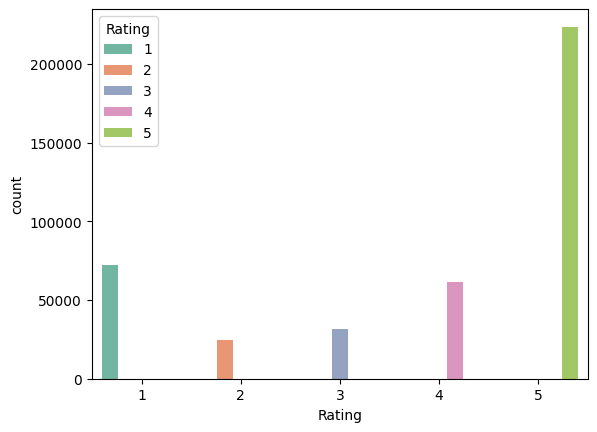

In [ ]:
import seaborn as sns
custom_palette = sns.color_palette("Set2")
sns.countplot(x='Rating', data=df1, palette=custom_palette, hue='Rating')


In [ ]:
def part(x1):
    if x1 < 3:
        return 'negative'
    return 'positive'
act_Sco = df1['Rating']
posNeg = act_Sco.map(part)
df1['RatingPosNeg'] = posNeg

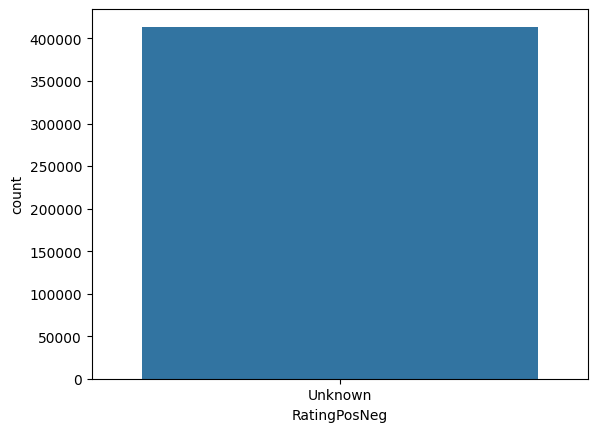

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Check for missing values in the 'RatingPosNeg' column
missing_values = df1['RatingPosNeg'].isnull().sum()
if missing_values > 0:
    # If there are missing values, fill them with a default value or handle them in a way that makes sense for your analysis
    df1['RatingPosNeg'].fillna('Unknown', inplace=True)
# Now you can use sns.countplot
sns.countplot(x='RatingPosNeg', data=df1)

# Show the plot
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english')
st=set(stopwords.words('english'))

fi = df1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clpunc(se):
    clean_data = re.sub(r'[?|!|\'|"|#]',r'',se)
    clean_data = re.sub(r'[.|,|)|(|\|/]',r' ',clean_data)
    return  clean_data

In [ ]:
final = df1.sample(n=10000, random_state=1)

In [ ]:
import re
i=0
st1=' '
final_str=[]
all_positive_words=[]
all_negative_words=[]
s1=''
for se in final['Reviews'].values:
    fil_se=[]
    try:
      for w in se.split():
          for c in clpunc(w).split():
              if((c.isalpha()) & (len(c)>2)):
                  if(c.lower() not in st):
                      s=(sno.stem(c.lower())).encode('utf8')
                      fil_se.append(s)
                      if (final['RatingPosNeg'].values)[i] == 'positive':
                          all_positive_words.append(s)
                      if(final['RatingPosNeg'].values)[i] == 'negative':
                          all_negative_words.append(s)
                  else:
                      continue
              else:
                  continue
      str1 = b" ".join(fil_se)

      final_str.append(str1)
      i+=1
    except AttributeError as e:
      final_str.append('')
      i+=1

In [ ]:
final['CleanedText']=final_str
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bo = count_vect.fit_transform(final['CleanedText'].values)
print(bo.shape)

(10000, 8444)


In [ ]:
term = count_vect.get_feature_names_out()

In [ ]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters=10,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=99, copy_x=True, algorithm='auto')
mod.fit(bo)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=10, n_init=10, random_state=99)

In [ ]:
lab = mod.labels_
cluster_center=mod.cluster_centers_

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bo, lab, metric='euclidean')
silhouette_score

0.27313704420543833

In [ ]:
df2 = final
df2['Bow Clus Label'] = mod.labels_
df2.head(2)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,Unknown,year cant realli complain gave teenag replac w...,5
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,Unknown,perfect thank,0


In [ ]:
df2.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0    7396
1       1
2       3
3      83
4     124
5    1922
6      16
7       1
8       2
9     452
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in ord_centroids[i1, :10]:
        print(' %s' % term[i], end='')
        print()


Top terms per cluster:
Cluster 0: phone
 work
 good
 great
 love
 use
 product
 excel
 like
 one
Cluster 1: appl
 iphon
 android
 phone
 samsung
 year
 even
 version
 compani
 know
Cluster 2: phone
 sim
 card
 use
 verizon
 updat
 work
 like
 new
 store
Cluster 3: phone
 use
 get
 like
 one
 screen
 work
 app
 batteri
 good
Cluster 4: phone
 use
 screen
 get
 batteri
 like
 app
 camera
 good
 devic
Cluster 5: phone
 work
 use
 great
 one
 good
 like
 get
 screen
 would
Cluster 6: phone
 use
 screen
 like
 app
 work
 get
 one
 good
 android
Cluster 7: phone
 one
 use
 issu
 band
 like
 far
 app
 good
 usa
Cluster 8: use
 app
 favorit
 screen
 phone
 display
 one
 great
 recent
 back
Cluster 9: phone
 use
 work
 one
 get
 like
 would
 screen
 good
 great


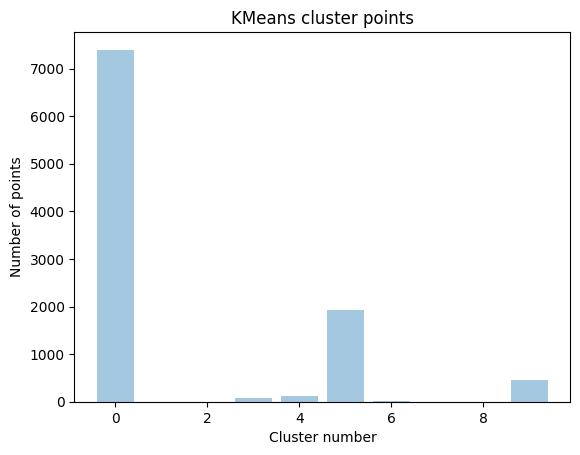

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x1 for x1 in range(10)], df2.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vect = TfidfVectorizer()
idf = idf_vect.fit_transform(final['CleanedText'].values)
idf.shape

(10000, 8444)

In [ ]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters = 10,random_state=99)
mod.fit(idf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [ ]:
lab_tf = mod.labels_
cluster_center_tf=mod.cluster_centers_
cluster_center_tf

array([[4.01978460e-04, 1.34721737e-05, 6.47380325e-05, ...,
        1.44784473e-04, 1.44784473e-04, 1.51394531e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
ter = idf_vect.get_feature_names_out()
ter[1:10]

array(['aac', 'aand', 'ab', 'abandon', 'abc', 'abd', 'abeautifulit',
       'abierto', 'abil'], dtype=object)

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(idf, lab_tf, metric='euclidean')
silhouette_score_tf

0.0631973109808856

In [ ]:
df3 = df2
df3['Tfidf Clus Label'] = mod.labels_
df3.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,Unknown,year cant realli complain gave teenag replac w...,5,3
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,Unknown,perfect thank,0,5
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,Unknown,back camera stop work phone touch screen stop ...,5,3
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,Unknown,good,0,2
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,Unknown,complaint work fine still work perfect tear we...,0,0


In [ ]:
df3.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0    3967
1     370
2     389
3    3547
4     403
5     252
6     373
7     322
8     172
9     205
Name: Reviews, dtype: int64

In [ ]:
print("Top terms per cluster:")
order_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in order_centroids[i1, :10]:
        print(' %s' % ter[i], end='')
        print()

Top terms per cluster:
Cluster 0: work
 good
 product
 thank
 nice
 phone
 use
 great
 like
 well
Cluster 1: excel
 product
 phone
 recommend
 thank
 love
 good
 seller
 purchas
 servic
Cluster 2: good
 phone
 product
 condit
 work
 far
 thank
 price
 cell
 problem
Cluster 3: phone
 use
 like
 work
 great
 one
 good
 batteri
 get
 new
Cluster 4: great
 phone
 work
 product
 buy
 condit
 price
 deal
 thank
 far
Cluster 5: perfect
 work
 condit
 phone
 product
 everyth
 love
 great
 thank
 came
Cluster 6: price
 awesom
 phone
 great
 good
 product
 work
 qualiti
 best
 fast
Cluster 7: love
 phone
 great
 new
 daughter
 good
 son
 thank
 iphon
 absolut
Cluster 8: excelent
 producto
 telefono
 celular
 recomendado
 telfono
 súper
 punto
 recomienda
 tlf
Cluster 9: expect
 met
 work
 phone
 better
 exceed
 product
 everyth
 great
 arriv


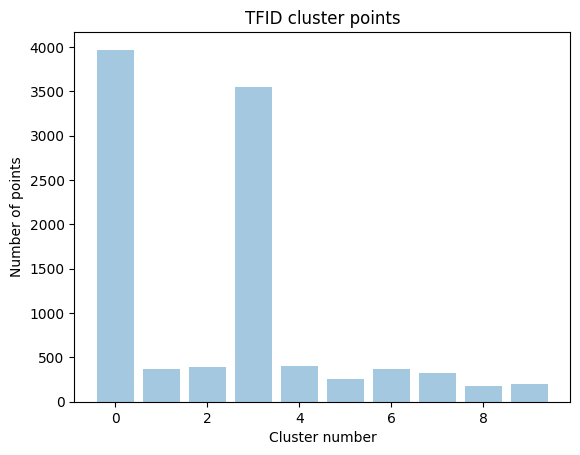

In [ ]:
plt.bar([x1 for x1 in range(10)], df3.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
i1=0
lst_of_sent=[]
for se in final['CleanedText'].values:
    lst_of_sent.append(se.split())

In [ ]:
i1=0
lst_sent_tr=[]
for s in final['CleanedText'].values:
    filter_sen=[]
    for w in se.split():
        for cle in clpunc(w).split():
            if(cle.isalpha()):
                filter_sen.append(cle.lower())
            else:
                continue
    lst_sent_tr.append(filter_sen)
print(lst_sent_tr)

[['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'pa

In [ ]:
import gensim
w2v_mod=gensim.models.Word2Vec(lst_sent_tr, workers=4)

In [ ]:
import numpy as np
se_vecs = [];
for se in lst_sent_tr:
    se_vec = np.zeros(100)
    cnt_words =0;
    for word in se:
        try:
            vec = w2v_mod.wv[word]
            se_vec += vec
            cnt_words += 1
        except:
            pass
    se_vec /= cnt_words
    se_vecs.append(se_vec)
se_vecs = np.array(se_vecs)
se_vecs = np.nan_to_num(se_vecs)
se_vecs.shape


(10000, 100)

In [ ]:
n_clu = [x1 for x1 in range(3,11)]
n_clu

[3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
squared_errors = []
for cluster in n_clu:
    kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
    squared_errors.append(kmeans.inertia_)
optimal_clusters = np.argmin(squared_errors) + 2
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-80-1e8e34ac2123>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-80-1e8e34ac2123>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value o

The optimal number of clusters obtained is -  2
The loss for optimal cluster is -  0.0


<ipython-input-80-1e8e34ac2123>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)


In [ ]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(se_vecs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-81-a5ea9372c7a3>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  model2.fit(se_vecs)


KMeans(n_clusters=2)

In [ ]:
word_cluster_pred=model2.predict(se_vecs)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-0.16184538,  0.12685705,  0.04001029,  0.1137373 ,  0.04639982,
        -0.00913536,  0.19714831,  0.14754015, -0.22601409, -0.09061528,
         0.06578852, -0.06628383,  0.01632268,  0.03063162,  0.0772994 ,
        -0.08571871,  0.15142947,  0.11780239, -0.2453272 , -0.22479506,
        -0.01109811, -0.01571357,  0.3500933 , -0.03814586,  0.00174655,
         0.02647534,  0.03883559,  0.05345482, -0.16652779,  0.07623001,
         0.16960154, -0.10993706, -0.03789078, -0.17965355, -0.03724573,
         0.1013005 ,  0.0872634 ,  0.01373973, -0.02472916, -0.02236456,
         0.11838899, -0.07466319, -0.13326713,  0.00408126,  0.15408434,
         0.05594238, -0.05519333,  0.01071946,  0.01422442, -0.03526249,
         0.01928926, -0.13429985, -0.03972567, -0.12182544, -0.17692715,
        -0.06520925,  0.03507382, -0.10009984, -0.09027027, -0.0828488 ,
         0.05302554, -0.08330832,  0.19822864, -0.0723022 , -0.07316061,
         0.16000022,  0.0338278 ,  0.22236165, -0.2

In [ ]:
df2 = df3
df2['AVG-W2V Clus Label'] = model2.labels_
df2.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,Unknown,year cant realli complain gave teenag replac w...,5,3,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,Unknown,perfect thank,0,5,0


In [ ]:
from sklearn.cluster import DBSCAN
mi_Pts = 2 * 100
def low_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mi_tr = int(l + (r - l) / 2)
        if nums[mi_tr] >= target:
            r = mi_tr - 1
        else:
            l = mi_tr + 1
    return l
def compute200thnearestneighbour(x, data):
    dists1 = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists1) == 200 and dists1[199] > dist):
            l = int(low_bound(dists1, dist))
            if l < 200 and l >= 0 and dists1[l] > dist:
                dists1[l] = dist
        else:
            dists1.append(dist)
            dists1.sort()

    return dists1[199]

In [ ]:
two_hund_neigh = []
for v1 in se_vecs[:1500]:
    two_hund_neigh.append( compute200thnearestneighbour(v1, se_vecs[:1500]) )
two_hund_neigh.sort()

In [ ]:
mod_DB = DBSCAN(eps = 5, min_samples = mi_Pts, n_jobs=-1)
mod_DB.fit(se_vecs)


DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [ ]:
df_db = df2
df_db['AVG-W2V Clus Label'] = mod_DB.labels_
df_db.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,Unknown,year cant realli complain gave teenag replac w...,5,3,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,Unknown,perfect thank,0,5,0


<Axes: xlabel='Tfidf Clus Label', ylabel='count'>

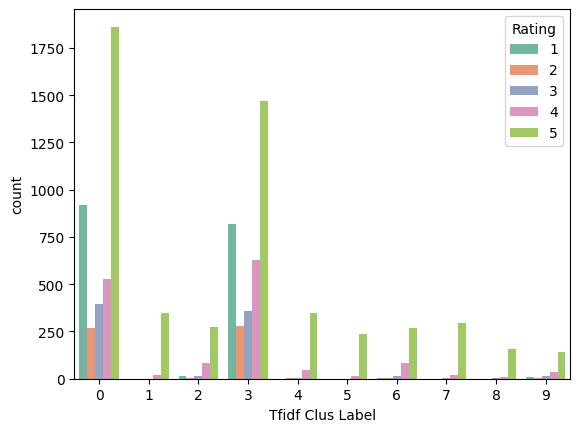

In [ ]:
custom_palette = sns.color_palette("Set2")
#sns.countplot(x='Rating', data=df1, palette=custom_palette, hue='Rating')
sns.countplot(x='Tfidf Clus Label', data=df_db, palette=custom_palette, hue='Rating')


In [ ]:
df2.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    10000
Name: Reviews, dtype: int64

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve
Agg=cluster.fit_predict(se_vecs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
agg_dafrme_a = df_db
agg_dafrme_a['AVG-W2V Clus Label'] = cluster.labels_
agg_dafrme_a.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,Unknown,year cant realli complain gave teenag replac w...,5,3,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,Unknown,perfect thank,0,5,0


In [ ]:
agg_dafrme_a.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    9996
1       1
2       1
3       1
4       1
Name: Reviews, dtype: int64

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

The goal of clustering algorithms like K-means, hierarchical clustering, and DBSCAN (Density-based spatial clustering of applications with noise) is to group data according to similarities. Data points are first clustered by similarity in K-means, and each cluster's centroids are chosen at random. The process is then repeated until convergence, assigning the remaining points to the closest centroid. In contrast, DBSCAN offers a flexible method that can handle different cluster shapes by classifying less dense regions as noise and identifying dense areas as clusters. Last but not least, hierarchical clustering creates a tree-like structure by repeatedly combining the most similar data points or clusters to create a hierarchy of clusters. Every algorithm has a distinct benefit in capturing various facets of the relationships and data structure, meeting the needs of various ckustering requirements in data analysis.